In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

In [2]:
# import relavent data

artists = pd.DataFrame.from_csv('mode/mode_artists_left_join.csv',index_col=None)
wiki = pd.DataFrame.from_csv('wikipedia/DailyWikiStats_disambiguation_2010_15.csv',index_col=None)
npr = pd.DataFrame.from_csv('npr/npr_shows_from_billboard_2010_15.csv',index_col='show_id')
#concerts = pd.DataFrame.from_csv('seatgeek/SeatGeek_events_from_billboard_2010_15.csv',index_col='id')
#venues = pd.DataFrame.from_csv('seatgeek/SeatGeek_venues_from_billboard_2010_15.csv',index_col='id')
concerts = pd.DataFrame.from_csv('songkick/songkick_events_2010_15.csv',index_col='id')
bill = pd.DataFrame.from_csv('billboard/BillboardData_mod_2000.csv',index_col='id')
bill_reorg = pd.DataFrame.from_csv('billboard/billboard_mod_2010_reorganized.csv',index_col=None)

In [3]:
print bill_reorg.keys()
bill_reorg.head()

Index([u'artist', u'featured', u'album', u'track', u'date_entered', u'year', u'yearly_rank', u'ch', u'x40', u'x10', u'pk', u'high', u'explicit', u'time', u'week', u'week_extracted', u'rank', u'date'], dtype='object')


,artist,featured,album,track,date_entered,year,yearly_rank,ch,x40,x10,pk,high,explicit,time,week,week_extracted,rank,date
0,Ke$ha,0,Animal,TiK ToK,10/24/2009 0:00,2010,1,38,35,20,9,1,NaN,200,x1st_week,1,79,10/24/2009
1,Eminem,0,Recovery,Love The Way You Lie,7/10/2010 0:00,2010,2,29,27,16,7,1,x,263,x1st_week,1,2,7/10/2010
2,Katy Perry,0,Teenage Dream (Deluxe Edition),California Gurls,5/29/2010 0:00,2010,3,27,25,17,6,1,NaN,236,x1st_week,1,2,5/29/2010
3,Rihanna,0,Rated R,Rude Boy,2/27/2010 0:00,2010,4,22,21,13,5,1,xc,222,x1st_week,1,64,2/27/2010
4,Bruno Mars,0,Doo-Wops & Hooligans,Just The Way You Are,8/7/2010 0:00,2010,5,48,43,22,4,1,NaN,220,x1st_week,1,43,8/7/2010


In [4]:
print artists.keys()
artists.head()

Index([u'artist_name', u'artist_name_clean', u'artist_name_dash', u'artist_name_query', u'artist_name_underscore', u'sg_artist_id', u'event_count', u'genres', u'sg_type', u'sg_artist_score', u'nbs_id', u'mbz_id', u'mbz_type', u'isni_list', u'country', u'area', u'begin_area', u'life_span_begin', u'genre1', u'genre2', u'genre3', u'genre4', u'genre5'], dtype='object')


,artist_name,artist_name_clean,artist_name_dash,artist_name_query,artist_name_underscore,sg_artist_id,event_count,genres,sg_type,sg_artist_score,...,isni_list,country,area,begin_area,life_span_begin,genre1,genre2,genre3,genre4,genre5
0,Zach Sobiech,Zach Sobiech,zach-sobiech,zach+sobiech,zach_sobiech,160111,0,NaN,band,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Soulja Boy Tell'em,Soulja Boy Tell'em,soulja-boy-tell'em,soulja+boy+tell'em,soulja_boy_tell'em,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austin Mahone,Austin Mahone,austin-mahone,austin+mahone,austin_mahone,12596,2,NaN,band,0.66274,...,NaN,US,United States,San Antonio,1996-04-04T00:00:00,RB,Pop,NaN,NaN,NaN
3,Britney Spears,Britney Spears,britney-spears,britney+spears,britney_spears,376,39,pop,band,0.68469,...,0000000109898265,US,United States,McComb,1981-12-02T00:00:00,Pop,NaN,NaN,NaN,NaN
4,Diggy,Diggy,diggy,diggy,diggy,28294,0,hip-hop,band,0.31305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wiki.head()

,date,search_term,Artist,artist_name_clean_x,Language,PageViews,ambiguous
0,2010-01-01 00:00:00,the_1975,"1975, The",The 1975,en,0,False
1,2010-01-02 00:00:00,the_1975,"1975, The",The 1975,en,0,False
2,2010-01-03 00:00:00,the_1975,"1975, The",The 1975,en,0,False
3,2010-01-04 00:00:00,the_1975,"1975, The",The 1975,en,0,False
4,2010-01-05 00:00:00,the_1975,"1975, The",The 1975,en,0,False


In [6]:
npr.tail()

,artist,artist_id,title,show,storyDate,pubDate,lastModifiedDate,link
show_id,,,,,,,,
359406863,Annie Lennox,16219258,Annie Lennox On World Cafe,World Cafe,2014-10-28 14:53:00,2014-12-08 23:16:00,2014-12-08 23:16:52,http://www.npr.org/sections/world-cafe/2014/10...
357622310,Annie Lennox,16219258,'You Cannot Go Back': Annie Lennox On 'Nostalgia',Music Interviews,2014-10-21 06:00:00,2014-10-21 19:08:00,2014-10-21 19:08:33,http://www.npr.org/2014/10/20/357622310/you-ca...
132259127,Annie Lennox,16219258,Music Icon Annie Lennox Belts Songs Of Christm...,Holiday Music,2010-12-23 17:00:00,2010-12-23 20:05:00,2010-12-23 20:05:05,http://www.npr.org/2010/12/23/132259127/music-...
15963705,Annie Lennox,16219258,The Best CDs of 2003: Listeners' Picks,All Songs Considered,2003-12-23 17:00:00,2012-12-12 16:25:00,2012-12-12 16:25:21,http://www.npr.org/templates/story/story.php?s...
15111080,Kid Rock,15325309,Band of Horses to 'Begin' Again,Music Articles,2007-10-09 11:00:00,2012-12-12 16:20:00,2012-12-12 16:20:37,http://www.npr.org/templates/story/story.php?s...


In [7]:
print concerts.keys()
concerts.head()

Index([u'mbz_id', u'artist_name', u'event_name', u'type', u'popularity', u'city', u'lat', u'lng', u'venue_name', u'country', u'state', u'artist_id', u'billing', u'billingIndex', u'date', u'datetime', u'time'], dtype='object')


,mbz_id,artist_name,event_name,type,popularity,city,lat,lng,venue_name,country,state,artist_id,billing,billingIndex,date,datetime,time
id,,,,,,,,,,,,,,,,,
10327278,b69b9854-f568-4a50-b076-309c459946a8,Austin Mahone,Austin Mahone at Texas Outback Bar & Grill (Se...,Concert,0.013323,"Helsinki, Finland",60.175600,24.934200,NaN,NaN,NaN,19885623,headline,1,2011-09-14 00:00:00,NaN,NaN
10329148,b69b9854-f568-4a50-b076-309c459946a8,Austin Mahone,Austin Mahone at Canada Games Arena (September...,Concert,0.013323,"Grande Prairie, AB, Canada",55.171200,-118.795000,Canada Games Arena,Canada,AB,19890008,headline,1,2011-09-15 00:00:00,NaN,NaN
10327283,b69b9854-f568-4a50-b076-309c459946a8,Austin Mahone,"Austin Mahone at Canada (September 16, 2011)",Concert,0.013323,"Toronto, ON, Canada",43.666700,-79.416700,Canada,Canada,ON,19885628,headline,1,2011-09-16 00:00:00,NaN,NaN
10329923,b69b9854-f568-4a50-b076-309c459946a8,Austin Mahone,"Austin Mahone at New York (September 16, 2011)",Concert,0.013323,"Augusta, GA, US",33.457400,-81.995000,New York,US,GA,19891683,headline,1,2011-09-16 00:00:00,NaN,NaN
10368608,b69b9854-f568-4a50-b076-309c459946a8,Austin Mahone,Austin Mahone at The Standard Hotel - New York...,Concert,0.013323,"New York, NY, US",40.740876,-74.007821,The Standard Hotel - New York City,US,NY,19978103,headline,1,2011-09-29 00:00:00,NaN,NaN


In [8]:
bill.head()

,year,yearly_rank,source,prefix,ch,x40,x10,pk,high,verified,...,x82nd_week,x83rd_week,x84th_week,x85th_week,x86th_week,x87th_week,x88th_week,x89th_week,x90th_week,x91st_week
id,,,,,,,,,,,,,,,,,,,,,
10112,2000,1,y,2000_001,28,25,17,11,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33870,2000,2,y,2000_002,26,24,18,10,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33975,2000,3,y,2000_003,33,28,17,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25621,2000,4,y,2000_004,24,22,12,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8017,2000,5,y,2000_005,21,16,8,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# restrict billboard to anything entering starting 2010
bill2010 = bill[bill['date_entered'] > '2010-01-01']

In [10]:
import re
def cleanName(name):
    """
    Use regular expressions to change an artist name string into
    a valid seatgeek slug.
    """
    s = name
    if ', The' in s:
        s = 'The ' + s[:-5]
    #r = re.compile(r"\s+")|
    #s = r.sub("-", s) # "a\nb\nc
    return s

In [11]:
# add npr artist id to artists
npr_artist_id = npr[['artist','artist_id']].drop_duplicates(subset=['artist_id'])
npr_artist_id = npr_artist_id.rename(columns = {'artist':'npr_artist','artist_id':'npr_artist_id'})
artists_npr = pd.merge(artists,npr_artist_id,how='left',left_on='artist_name_clean',
                      right_on='npr_artist')

artists = artists_npr
#artists.npr_artist_id = artists.npr_artist_id.astype(int)

In [12]:
# add billoboard id to artist list
artists10_15 = bill2010[['artist_standardized','artist_id']].drop_duplicates(subset=['artist_id'])
artists10_15['billboard_artist'] = artists10_15.artist_standardized.apply(cleanName)

artists10_15.columns = [['artist_standardized','billboard_artist_id','billboard_artist']]

artists_bill = pd.merge(artists,artists10_15,how='left',left_on='artist_name_clean',right_on='billboard_artist')
#for i,x in artists10_15.iterrows():
#    artists[artists.artist_name_clean == x.artist_standardized]['billboard_artist_id'] = x.artist_id

artists = artists_bill

In [13]:
# ranges for time-series
d_rng =  pd.date_range('2010-01-01','2015-08-01',freq='D',normalize=True)
w_rng = pd.date_range('2010-01-01','2015-08-01',freq='W',normalize=True)
m_rng = pd.date_range('2010-01-01','2015-08-01',freq='M',normalize=True)
y_rng = pd.date_range('2010-01-01','2015-08-01',freq='A',normalize=True)

In [14]:
# aggregate number of npr shows
npr_stats = pd.DataFrame()
npr_stats_frac = pd.DataFrame()

for i,artist in artists[pd.notnull(artists.npr_artist_id)].iterrows():

    #artist = artists[pd.notnull(artists.npr_artist_id)].iloc[0]
    a_npr = npr[npr.artist_id == artist.npr_artist_id ]

    total = len(a_npr)

    g_show = a_npr.groupby('show')
    shows = g_show['artist_id'].count()

    cols = np.hstack([x.keys() for x in [shows]])
    vals = np.hstack([x.values for x in [shows]])
    fvals = vals / float(total)
    fvals

    df_num = pd.DataFrame([vals],columns=cols,index =[artist.artist_name_clean])
    df_frac = pd.DataFrame([vals/float(total)],columns=cols,index = [artist.artist_name_clean])
    df_num['total'] = total
    df_frac['total'] = total

    npr_stats = pd.concat([npr_stats,df_num])
    npr_stats_frac = pd.concat([npr_stats_frac,df_frac])

npr_stats_frac = npr_stats_frac.fillna(0.)
npr_stats = npr_stats.fillna(0)
npr_stats.head()

,A Blog Supreme,All Songs Considered,All Songs TV,Alt.Latino,Arts & Life,Author Interviews,Best Music Of 2011,Best Music Of 2012,Best Music Of 2013,Commentary,...,Sweatin' To NPR: Workout Music,The Best Music Of 2009,The Best Music Of 2014,The Decade In Music: '00s,The Record,Tiny Desk,U.S.,What Makes It Great,World Cafe,total
Britney Spears,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
Glen Campbell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
Mary Mary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Missy Elliott,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Little Big Town,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
# create npr time series

npr_by_week = pd.DataFrame()
npr_by_month = pd.DataFrame()
npr_by_year = pd.DataFrame()


# earliest date in the dataset
mindate = pd.to_datetime(npr.storyDate).min()
# nowish
maxdate = '2015-08-01'

for i,artist in artists[pd.notnull(artists.npr_artist_id)].iterrows():

    a_npr = npr[npr.artist_id == artist.npr_artist_id]
    a_npr['count'] = 1
    npr_series = a_npr.set_index(pd.DatetimeIndex(a_npr['storyDate']))
    #concert_series = a_concerts.set_index(pd.datetimeIn'date')
    months = npr_series['count'].resample('M', how='sum')
    years = npr_series['count'].resample('A', how='sum')
    weeks = npr_series['count'].resample('W', how='sum')
    
    months = months.reindex(pd.date_range(mindate,maxdate,freq='M',normalize=True))
    weeks = weeks.reindex(pd.date_range(mindate,maxdate,freq='W',normalize=True))
    years = years.reindex(pd.date_range(mindate,maxdate,freq='A',normalize=True))

    #npr_by_week[int(artist['npr_artist_id'])] = weeks
    #npr_by_year[int(artist['npr_artist_id'])] = years
    #npr_by_month[int(artist['npr_artist_id'])] = months

    npr_by_week[artist.artist_name_clean] = weeks
    npr_by_year[artist.artist_name_clean] = years
    npr_by_month[artist.artist_name_clean] = months
    
npr_by_week = npr_by_week.fillna(0)
npr_by_year = npr_by_year.fillna(0)
npr_by_month = npr_by_month.fillna(0)

npr_by_year.tail()

/Users/swahl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Britney Spears,Glen Campbell,Mary Mary,Missy Elliott,Little Big Town,The Fray,Green Day,Ashton Shepherd,Maxwell,Jamie Foxx,...,Wale,Foo Fighters,Kid Rock,Eric Church,Alabama Shakes,50 Cent,Adele,Carly Rae Jepsen,Brad Paisley,Kreayshawn
2010-12-31,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2011-12-31,0,2,0,0,0,0,0,2,0,0,...,0,2,0,2,0,0,4,0,2,2
2012-12-31,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,5,4,0,0
2013-12-31,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,3,0
2014-12-31,0,1,0,0,0,0,0,0,0,0,...,0,2,0,2,0,0,0,0,0,0


In [16]:
# Aggregate number of concerts
concert_stats = pd.DataFrame()
concert_stats_frac = pd.DataFrame()

for i,artist in artists[pd.notnull(artists.mbz_id)].iterrows():
#artist = artists.iloc[3]

    df_num = pd.DataFrame()
    df_frac = pd.DataFrame()

    a_concerts = concerts[concerts.mbz_id == artist.mbz_id]

    total = len(a_concerts)

    # groupbys
    #g_city = a_concerts.groupby('city')
    g_country = a_concerts.groupby('country')
    g_state = a_concerts.groupby('state')
    g_type = a_concerts.groupby('type')
    g_billing = a_concerts.groupby('billing')

    # counts
    states = g_state['mbz_id'].count()
    countrys = g_country['mbz_id'].count()
    types = g_type['mbz_id'].count()
    billings = g_billing['mbz_id'].count()

    #
    cols = np.hstack([x.keys() for x in [types,billings,countrys,states]])
    vals = np.hstack([x.values for x in [types,billings,countrys,states]])
    fvals = vals / float(total)
    fvals

    df_num = pd.DataFrame([vals],columns=cols,index =[artist.artist_name_clean])
    df_frac = pd.DataFrame([vals/float(total)],columns=cols,index = [artist.artist_name_clean])
    df_num['total'] = total
    df_frac['total'] = total

    concert_stats = pd.concat([concert_stats,df_num])
    concert_stats_frac = pd.concat([concert_stats_frac,df_frac])

concert_stats_frac = concert_stats_frac.fillna(0.)
concert_stats = concert_stats.fillna(0)
concert_stats.head()

,AB,ACT,AK,AL,AR,AZ,Australia,BC,CA,CO,...,UT,VA,VIC,VT,WA,WI,WV,WY,headline,total
Austin Mahone,1,0,0,1,1,1,0,1,11,1,...,1,0,0,1,3,2,1,0,106,158
Britney Spears,0,0,0,0,0,1,0,1,6,0,...,0,0,0,0,1,2,0,0,188,210
Childish Gambino,0,0,0,2,0,3,8,3,33,4,...,2,1,2,0,5,1,0,0,134,210
Glen Campbell,0,0,0,1,3,2,4,0,15,2,...,1,0,2,0,3,5,2,0,181,195
Mary Mary,0,0,0,5,0,1,1,0,4,2,...,0,5,1,0,1,0,0,0,0,87


In [17]:
# create concert time series

concerts_by_week = pd.DataFrame()
concerts_by_month = pd.DataFrame()
concerts_by_year = pd.DataFrame()

for i,artist in artists[pd.notnull(artists.mbz_id)].iterrows():
#artist = artists.iloc[3]
#a_concerts.date = pd.to_datetime(a_concerts)

    a_concerts = concerts[concerts.mbz_id == artist.mbz_id]
    a_concerts['count'] = 1
    concert_series = a_concerts.set_index(pd.DatetimeIndex(a_concerts['date']))
    #concert_series = a_concerts.set_index(pd.datetimeIn'date')
    months = concert_series['count'].resample('M', how='sum')
    years = concert_series['count'].resample('A', how='sum')
    weeks = concert_series['count'].resample('W', how='sum')
    
    months = months.reindex(m_rng)
    weeks = weeks.reindex(w_rng)
    years = years.reindex(y_rng)

    #concerts_by_week[artist['mbz_id']] = weeks
    #concerts_by_year[artist['mbz_id']] = years
    #concerts_by_month[artist['mbz_id']] = months
    concerts_by_week[artist['artist_name_clean']] = weeks
    concerts_by_year[artist['artist_name_clean']] = years
    concerts_by_month[artist['artist_name_clean']] = months

concerts_by_week = concerts_by_week.fillna(0)
concerts_by_year = concerts_by_year.fillna(0)
concerts_by_month = concerts_by_month.fillna(0)

concerts_by_month.head()

/Users/swahl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Austin Mahone,Britney Spears,Childish Gambino,Glen Campbell,Mary Mary,Lucy Hale,MKTO,Tinashe,Sean Kingston,Keith Urban,...,Carly Rae Jepsen,The Wanted,Brad Paisley,Young Thug,Gary Allan,Tove Lo,Zac Brown Band,Kreayshawn,Mann,Trace Adkins
2010-01-31,0,0,0,4,1,0,0,0,8,0,...,2,0,11,0,4,0,4,0,0,6
2010-02-28,0,0,0,1,0,0,0,0,6,0,...,0,0,7,0,11,0,1,0,0,14
2010-03-31,0,0,0,2,0,0,0,0,3,2,...,3,0,6,0,6,0,16,0,0,9
2010-04-30,0,0,0,9,0,0,0,0,7,7,...,0,1,2,0,9,0,3,0,0,7
2010-05-31,0,0,0,11,1,0,0,0,0,1,...,0,0,8,0,9,0,9,0,0,0


In [44]:
# aggregate wikipedia by date month,week,year

wiki_by_week = pd.DataFrame()
wiki_by_month = pd.DataFrame()
wiki_by_year = pd.DataFrame()

for i,artist in artists[ artists.artist_name_underscore.isin(
        np.unique(wiki.search_term[np.logical_not(wiki.ambiguous)]))].iterrows():
#artist = artists.iloc[3]
#a_concerts.date = pd.to_datetime(a_concerts)

    a_wiki = wiki[wiki.search_term == artist.artist_name_underscore]
    #a_wiki['count'] = 1
    wiki_series = a_wiki.set_index(pd.DatetimeIndex(a_wiki['date']))
    #concert_series = a_concerts.set_index(pd.datetimeIn'date')
    months = wiki_series.PageViews.resample('M', how='sum')
    years = wiki_series.PageViews.resample('A', how='sum')
    weeks = wiki_series.PageViews.resample('W', how='sum')
    
    months = months.reindex(m_rng)
    weeks = weeks.reindex(w_rng)
    years = years.reindex(y_rng)

    wiki_by_week[artist['artist_name_clean']] = weeks
    wiki_by_year[artist['artist_name_clean']] = years
    wiki_by_month[artist['artist_name_clean']] = months

wiki_by_week = wiki_by_week.fillna(0)
wiki_by_year = wiki_by_year.fillna(0)
wiki_by_month = wiki_by_month.fillna(0)

wiki_by_month.head()

,Zach Sobiech,Soulja Boy Tell'em,Austin Mahone,Britney Spears,Diggy,Fitz And The Tantrums,Childish Gambino,Glen Campbell,Natalie La Rose,Mary Mary,...,The Wanted,Brad Paisley,Young Thug,Gary Allan,Tove Lo,Zac Brown Band,Kreayshawn,The Chainsmokers,Ty Dolla $ign,Trace Adkins
2010-01-31,0,1589,0,400180,22,23,203,24572,0,18796,...,5,52692,4,18521,0,31343,0,0,0,24790
2010-02-28,0,1433,0,350596,14,18,228,28612,0,46377,...,9,45983,4,18762,0,95167,0,0,0,23554
2010-03-31,0,883,0,342037,26,36,538,28180,2,29353,...,11,54491,2,41928,0,43654,0,0,0,23031
2010-04-30,2,663,0,338469,19,21,484,29521,0,24479,...,12,67059,3,19085,0,45300,0,0,0,28151
2010-05-31,0,598,0,351988,140,42,880,28446,0,20560,...,14,75265,2,18712,0,40578,0,0,0,20799


In [103]:
# aggregate statistics from wikipedia 
wiki_stats = pd.DataFrame()

for i,a in artists[ artists.artist_name_underscore.isin(
        np.unique(wiki.search_term[np.logical_not(wiki.ambiguous)]))].iterrows():
 
    # a = artists.iloc[3]
    artist = a.artist_name_clean
    a_wiki = wiki[wiki.search_term == a.artist_name_underscore]

    vals = []
    cols = []

    total = a_wiki.PageViews.sum()
    vals.append(total)
    cols.append('total')

    for s,freq in zip([a_wiki.PageViews,wiki_by_week[artist],wiki_by_month[artist],wiki_by_month[artist]],
                   ['daily','weekly','monthly','yearly']):

        vals += [s.max(),s.min(),s.std(),s.skew()]+list(s.quantile([.25,.5,.75]))
        cols += [freq + '_' + met for met in ['max','min','std','skew','q25','q50','q75'] ]

    df = pd.DataFrame([vals],columns=cols,index =[artist])
    wiki_stats = wiki_stats.append(df)

#wiki_stats = npr_stats.fillna(0)
wiki_stats.head()

,total,daily_max,daily_min,daily_std,daily_skew,daily_q25,daily_q50,daily_q75,weekly_max,weekly_min,...,monthly_q25,monthly_q50,monthly_q75,yearly_max,yearly_min,yearly_std,yearly_skew,yearly_q25,yearly_q50,yearly_q75
Zach Sobiech,441222,30324,0,1181.907714,16.369696,0.00,0.0,127.0,101042,0,...,0.0,0,4149.5,142051,0,19929.138392,5.384231,0.0,0,4149.5
Soulja Boy Tell'em,31863,175,0,12.629264,2.890187,8.00,12.0,19.0,448,6,...,308.0,352,587.5,1589,103,282.478866,1.804914,308.0,352,587.5
Austin Mahone,3670064,34138,0,2231.477263,3.062794,1.00,1077.0,2868.5,94110,0,...,116.0,32780,91389.0,243192,0,59672.689578,1.080660,116.0,32780,91389.0
Britney Spears,25423401,72737,0,6293.222868,1.641061,7737.25,12129.5,15628.0,236971,3994,...,226751.5,376637,466041.5,770706,87856,162163.120192,0.392943,226751.5,376637,466041.5
Diggy,43178,1519,0,65.379456,10.877031,3.00,10.0,19.0,4758,2,...,99.0,310,568.5,12342,14,1605.824005,6.386406,99.0,310,568.5


In [19]:
# get relative date since last concert, npr show and date_entered / date_peaked / wikipedia date

In [20]:
# build a table with billboard statistics for each artist (THIS DOESNT SEEM TO MATCH SOME OF THE WEEKLY DATA)

bill2010.date_entered = pd.to_datetime(bill2010.date_entered)
bill2010.date_peaked = pd.to_datetime(bill2010.date_peaked)

billboard_artist_stats = pd.DataFrame()

for i,artist in artists[pd.notnull(artists.billboard_artist_id)].iterrows():
    #artist = artists.iloc[3]
    a_bill = bill2010[bill2010.artist_id == 
                      artist.billboard_artist_id]

    # get ids for outstanding tracks
    first_track_idx = a_bill.date_entered.argmin() 
    last_track_idx = a_bill.date_entered.argmax()
    highest_track_idx = a_bill.high.argmin()
    longest_track_idx = a_bill.ch.argmax()

    # get interesting dates:
    first_entered = a_bill.loc[first_track_idx].date_entered
    last_entered = a_bill.loc[last_track_idx].date_entered
    peak_date = a_bill.loc[highest_track_idx].date_peaked

    # single number stats
    # track bests
    highest = a_bill.high.min()
    longest = a_bill.ch.max()
    longest40 = a_bill.x40.max()
    longest10 = a_bill.x10.max()

    # totaled lifetime
    weeks_total = a_bill.ch.sum()
    weeks_total10 = a_bill.x10.sum()
    weeks_total40 = a_bill.x40.sum()

    # number of tracks
    tracks = len(a_bill)
    tracks10 = len(a_bill[a_bill.x10 > 0])
    tracks40 = len(a_bill[a_bill.x40 > 0])

    df = pd.DataFrame([[tracks,tracks10,tracks40,weeks_total,weeks_total10,weeks_total40,
                       highest,longest,longest40,longest10,
                        first_entered,last_entered,peak_date,
                       first_track_idx,last_track_idx,highest_track_idx,longest_track_idx]],
                      columns=
                      ['tracks','tracks10','tracks40','weeks_total','weeks_total10','weeks_total40',
                       'highest','longest','longest40','longest10',
                        'first_entered','last_entered','peak_date',
                       'first_track_idx','last_track_idx','highest_track_idx','longest_track_idx'],
                     index=[artist.artist_name_clean])
    billboard_artist_stats = billboard_artist_stats.append(df)

billboard_artist_stats_original = billboard_artist_stats
billboard_artist_stats_original.head()


/Users/swahl/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1974: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tracks,tracks10,tracks40,weeks_total,weeks_total10,weeks_total40,highest,longest,longest40,longest10,first_entered,last_entered,peak_date,first_track_idx,last_track_idx,highest_track_idx,longest_track_idx
Zach Sobiech,1,0,1,2,0,1,26,2,1,0,2013-06-08,2013-06-08,2013-06-08,39894,39894,39894,39894
Soulja Boy Tell'em,1,0,1,16,0,4,34,16,4,0,2010-07-03,2010-07-03,2010-08-21,35004,35004,35004,35004
Austin Mahone,2,0,0,24,0,0,49,15,0,0,2013-06-29,2014-02-08,2014-05-03,2453,2452,2452,2452
Britney Spears,7,3,4,91,18,54,1,24,23,9,2011-01-29,2013-11-23,2011-01-29,6231,6230,6231,6232
Diggy,1,0,0,8,0,0,80,8,0,0,2012-02-11,2012-02-11,2012-04-07,10426,10426,10426,10426


In [21]:
# Aggregate billboard position by week

In [39]:
bill_main = bill_reorg[bill_reorg.featured == 0]
bill_main['artist_standardized'] = bill_main.artist.apply(cleanName)
bill_main.date = pd.to_datetime(bill_main.date)

/Users/swahl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/swahl/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1974: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
# Genereate weekly billboard timeseries and track statistics

# earliest date in the dataset
mindate = pd.to_datetime(bill_main.date).min()
# nowish
maxdate = pd.to_datetime(bill_main.date).max()

billboard_by_week = pd.DataFrame()
billboard_track_stats = pd.DataFrame()
billboard_by_week_long = pd.DataFrame()

g = bill_main.groupby(['track','artist_standardized'])
groups = g.groups 

for key in groups.keys():
    #key = ('Elastic Heart','Sia')
    ids = groups[key]
    track = key[0]
    artist = cleanName(key[1])
    try:
        #billboard_id = bill2010[bill2010.track == track].index[0]
        billboard_id = bill2010[np.logical_and(bill2010.track == track, bill2010.artist_standardized == artist)].index[0]
        artist_id = bill2010.artist_id[bill2010.artist_standardized == artist].iloc[0]
    except:
        billboard_id = None
        artist_id = None
    else:

        a_track = bill_main.loc[ids]
        track_series = a_track.set_index(pd.DatetimeIndex(a_track['date']))

        # resample for a consistant timeseries
        weeks = track_series['rank'].resample('W', how='sum')
        weeks = weeks.reindex(pd.date_range(mindate,maxdate,freq='W',normalize=True) )

        # save as column in a dataframe
        billboard_by_week[billboard_id] = weeks
        
        df = pd.DataFrame(weeks)
        df.columns = ['rank']
        df['date'] = df.index
        df['artist'] = artist
        df['track'] = track
        df['track_id'] = track
        df['artist_id'] = artist_id
        billboard_by_week_long.append(df)

        # lifespan on chart
        span = len(track_series)
        span10 = len(track_series[track_series['rank']<11])
        span40 = len(track_series[track_series['rank']<41])
        peak = track_series['rank'].min()
        span_peak = len(track_series[track_series['rank'] == peak])

        # dates of interest
        week_entered = weeks[pd.notnull(weeks)].index.min()
        week_peaked = weeks.argmin()

        stats = pd.DataFrame([[artist,artist_id,track,billboard_id,peak,span,span_peak,span10,span40,week_entered,week_peaked]],
                            columns=['artist','artist_id','track','track_id','peak','span','span_peak','span10','span40','week_entered','week_peaked'],
                            index=[billboard_id])

        billboard_track_stats = billboard_track_stats.append(stats)

print billboard_track_stats.tail()
billboard_by_week.tail()

              artist  artist_id                                 track  \
36220   Taylor Swift       7850                          Shake It Off   
11743  Easton Corbin       8064                     Lovin' You Is Fun   
23026  Kelly Rowland       7677                                   Ice   
30703        Pitbull       4915                        Wild Wild Love   
16183      Glee Cast       8043  I Love New York / New York, New York   

       track_id  peak  span  span_peak  span10  span40 week_entered  \
36220     36220     1     8          2       8       8   2014-09-07   
11743     11743    57    20          1       0       0   2012-07-08   
23026     23026    88    12          1       0       0   2012-09-16   
30703     30703    30    18          2       0       5   2014-03-16   
16183     16183    81     1          1       0       0   2011-06-12   

      week_peaked  
36220  2014-09-07  
11743  2012-11-11  
23026  2012-12-16  
30703  2014-05-18  
16183  2011-06-12  


,21232,30704,34853,30708,37819,37952,7932,9352,16214,16115,...,16108,22493,28862,7987,1939,36220,11743,23026,30703,16183
2015-02-22,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-08,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-15,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-22,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# build a table with billboard statistics for each artist (that is consistant with the time series,
# but also seems to include less entries)

billboard_track_stats.date_entered = pd.to_datetime(billboard_track_stats.week_entered)
billboard_track_stats.date_peaked = pd.to_datetime(billboard_track_stats.week_peaked)

billboard_artist_stats = pd.DataFrame()

for i,artist in artists[pd.notnull(artists.billboard_artist_id)].iterrows():
    #artist = artists.iloc[3]
    a_bill = billboard_track_stats[billboard_track_stats.artist_id == 
                      artist.billboard_artist_id]
    try:
        # get ids for outstanding tracks
        first_track_idx = a_bill.week_entered.argmin() 
        last_track_idx = a_bill.week_entered.argmax()
        highest_track_idx = a_bill.peak.argmin()
        longest_track_idx = a_bill.span.argmax()

        # get interesting dates:
        first_entered = a_bill.loc[first_track_idx].week_entered
        last_entered = a_bill.loc[last_track_idx].week_entered
        peak_date = a_bill.loc[highest_track_idx].week_peaked

        # single number stats
        # track bests
        highest = a_bill.peak.min()
        longest = a_bill.span.max()
        longest40 = a_bill.span40.max()
        longest10 = a_bill.span10.max()

        # totaled lifetime
        weeks_total = a_bill.span.sum()
        weeks_total10 = a_bill.span10.sum()
        weeks_total40 = a_bill.span40.sum()

        # number of tracks
        tracks = len(a_bill)
        tracks10 = len(a_bill[a_bill.span10 > 0])
        tracks40 = len(a_bill[a_bill.span40 > 0])

        df = pd.DataFrame([[tracks,tracks10,tracks40,weeks_total,weeks_total10,weeks_total40,
                           highest,longest,longest40,longest10,
                            first_entered,last_entered,peak_date,
                           first_track_idx,last_track_idx,highest_track_idx,longest_track_idx]],
                          columns=
                          ['tracks','tracks10','tracks40','weeks_total','weeks_total10','weeks_total40',
                           'highest','longest','longest40','longest10',
                            'first_entered','last_entered','peak_date',
                           'first_track_idx','last_track_idx','highest_track_idx','longest_track_idx'],
                         index=[artist.artist_name_clean])
        billboard_artist_stats = billboard_artist_stats.append(df)
    except:
        print artist.billboard_artist_id

billboard_artist_stats_consistent = billboard_artist_stats
billboard_artist_stats.head()

2709.0
8107.0
7785.0
3346.0
8305.0
7846.0
8120.0
4532.0
8300.0
7024.0
7204.0
8117.0
5771.0
8383.0
7165.0
7789.0
8109.0
6713.0
8122.0
8102.0
7884.0
8078.0
4249.0
8364.0
8128.0
8093.0
6796.0
8259.0
8142.0
8197.0
7183.0
8230.0
8275.0
8012.0
8089.0
8196.0
8257.0
8370.0


,tracks,tracks10,tracks40,weeks_total,weeks_total10,weeks_total40,highest,longest,longest40,longest10,first_entered,last_entered,peak_date,first_track_idx,last_track_idx,highest_track_idx,longest_track_idx
Zach Sobiech,1,0,1,2,0,1,26,2,1,0,2013-06-09,2013-06-09,2013-06-09,39894,39894,39894,39894
Soulja Boy Tell'em,1,0,1,16,0,4,34,16,4,0,2010-07-04,2010-07-04,2010-08-22,35004,35004,35004,35004
Austin Mahone,2,0,0,24,0,0,49,15,0,0,2013-06-30,2014-02-09,2014-05-04,2453,2452,2452,2452
Britney Spears,7,3,4,91,18,54,1,24,23,9,2011-01-30,2013-11-24,2011-01-30,6231,6230,6231,6232
Diggy,1,0,0,8,0,0,80,8,0,0,2012-02-12,2012-02-12,2012-04-08,10426,10426,10426,10426


In [22]:
# artist tracks
artist_tracks = bill_main.groupby('artist').groups

NameError: name 'bill_main' is not defined

In [23]:
bill2010['artist_name_clean'] = bill2010.artist_standardized.apply(cleanName)

/Users/swahl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [177]:
# exporting data
import pickle
# artist table
artists.to_csv('timeseries/ts_artist_table.csv',index_label='date',encoding="utf-8")

# time-series (indexed by artist.artist_name_clean)
concerts_by_week.to_csv('timeseries/ts_concerts_by_week.csv',index_label='date',encoding="utf-8")
concerts_by_month.to_csv('timeseries/ts_concerts_by_month.csv',index_label='date',encoding="utf-8")
concerts_by_year.to_csv('timeseries/ts_concerts_by_year.csv',index_label='date',encoding="utf-8")

npr_by_week.to_csv('timeseries/ts_npr_by_week.csv',index_label='date',encoding="utf-8")
npr_by_month.to_csv('timeseries/ts_npr_by_month.csv',index_label='date',encoding="utf-8")
npr_by_year.to_csv('timeseries/ts_npr_by_year.csv',index_label='date',encoding="utf-8")

wiki_by_week.to_csv('timeseries/ts_wiki_by_week.csv',index_label='date',encoding="utf-8")
wiki_by_month.to_csv('timeseries/ts_wiki_by_month.csv',index_label='date',encoding="utf-8")
wiki_by_year.to_csv('timeseries/ts_wiki_by_year.csv',index_label='date',encoding="utf-8")

# time-series (indexed by track_id bill, see artist_tracks dict)
billboard_by_week.to_csv('timeseries/ts_billoboard_by_week.csv',index_label='date',encoding="utf-8")
pickle.dump( artist_tracks, open( "timeseries/artist_tracks_dict.p", "wb" ) )

npr_stats.to_csv('timeseries/wiki_stats.csv',index_label='artist',encoding="utf-8")
npr_stats.to_csv('timeseries/npr_stats.csv',index_label='artist',encoding="utf-8")
concert_stats.to_csv('timeseries/concert_stats.csv',index_label='artist',encoding="utf-8")
billboard_artist_stats_consistent.to_csv('timeseries/billboard_artist_stats.csv',index_label='artist',encoding="utf-8")
billboard_track_stats.to_csv('timeseries/billboard_track_stats.csv',index_label='track_id',encoding="utf-8")


In [24]:
import pickle
# load data
# artist table
artists = pd.DataFrame.from_csv('timeseries/ts_artist_table.csv',index_col='date')

# time-series (indexed by artist.artist_name_clean)
concerts_by_week = pd.DataFrame.from_csv('timeseries/ts_concerts_by_week.csv',index_col='date')
concerts_by_month = pd.DataFrame.from_csv('timeseries/ts_concerts_by_month.csv',index_col='date')
concerts_by_year = pd.DataFrame.from_csv('timeseries/ts_concerts_by_year.csv',index_col='date')

npr_by_week = pd.DataFrame.from_csv('timeseries/ts_npr_by_week.csv',index_col='date')
npr_by_month = pd.DataFrame.from_csv('timeseries/ts_npr_by_month.csv',index_col='date')
npr_by_year = pd.DataFrame.from_csv('timeseries/ts_npr_by_year.csv',index_col='date')

wiki_by_week = pd.DataFrame.from_csv('timeseries/ts_wiki_by_week.csv',index_col='date')
wiki_by_month = pd.DataFrame.from_csv('timeseries/ts_wiki_by_month.csv',index_col='date')
wiki_by_year = pd.DataFrame.from_csv('timeseries/ts_wiki_by_year.csv',index_col='date')

# time-series (indexed by track_id bill, see artist_tracks dict)
billboard_by_week = pd.DataFrame.from_csv('timeseries/ts_billoboard_by_week.csv',index_col='date')
artist_tracks = pickle.load( open( "timeseries/artist_tracks_dict.p", "rb" ) )

npr_stats = pd.DataFrame.from_csv('timeseries/npr_stats.csv',index_col='artist')
concert_stats = pd.DataFrame.from_csv('timeseries/concert_stats.csv',index_col='artist')
wiki_stats = pd.DataFrame.from_csv('timeseries/wiki_stats.csv',index_col='artist')
billboard_artist_stats_consistent = pd.DataFrame.from_csv('timeseries/billboard_artist_stats.csv',index_col='artist')
billboard_track_stats = pd.DataFrame.from_csv('timeseries/billboard_track_stats.csv',index_col='track_id')

In [18]:
# Plotting 

In [25]:
import seaborn as sns#; sns.set(color_codes=True)
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline 

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 8  # that's default image size for this 


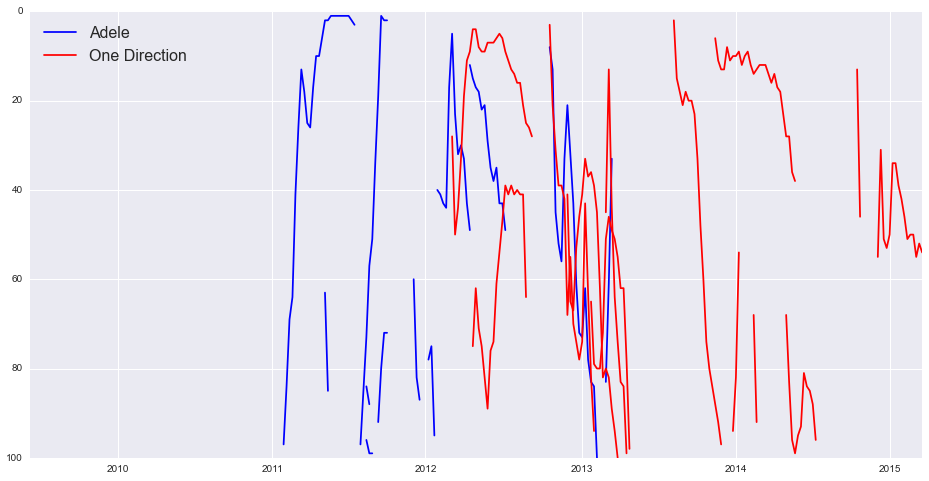

In [42]:
# compare billboard position for 2 artists

artist_tracks = bill2010.groupby('artist_name_clean').groups
artist = 'Adele'; artist2 = 'One Direction'
tracks = [x for x in artist_tracks[artist] if x in billboard_by_week.keys()]

tracks2 = [x for x in artist_tracks[artist2] if x in billboard_by_week.keys()]

data = billboard_by_week[tracks]
data2 = billboard_by_week[tracks2]
f = plt.figure()
#ax = plt.subplot(111)
ax = data.plot(style='b-',legend=False)
data2.plot(ax=ax,style='r-',legend=False)
ax.set_ybound(100,0)
ax.invert_yaxis()
lgd = ax.legend()
lgd.set_visible(False)

#Create legend from custom artist/label lists
a1 = plt.Line2D((0,1),(0,0), color='b', linestyle='-')
a2 = plt.Line2D((0,1),(0,0), color='r',linestyle='-')

ax.legend([a1,a2],
          [artist, artist2],fontsize=16,loc='upper left')

 

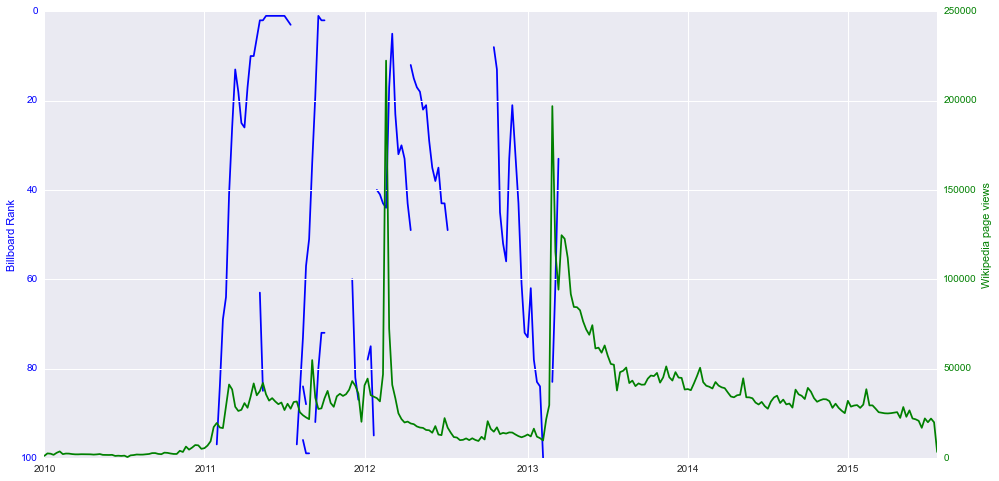

In [46]:
# Plot billboard history versus page_views
artist = 'Adele'

artist_tracks = bill2010.groupby('artist_name_clean').groups

tracks = [x for x in artist_tracks[artist] if x in billboard_by_week.keys()]

data = billboard_by_week[tracks]
data2 = wiki_by_week[artist]

f = plt.figure()
#ax = plt.subplot(111)
ax = data.plot(style='b-',legend=False)
ax.set_ybound(100,0)
ax.invert_yaxis()


ax2 = ax.twinx()
data2.plot(ax=ax2,style='g-',legend=False)

# Make the y-axis label and tick labels match the line color.
ax.set_ylabel('Billboard Rank', color='b')
for tl in ax.get_yticklabels():
    tl.set_color('b')

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Wikipedia page views', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

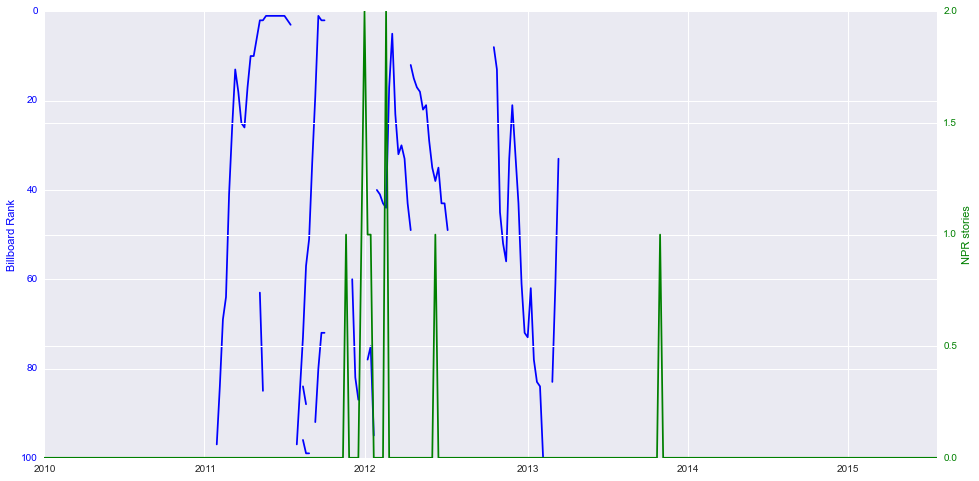

In [47]:
# Plot billboard history versus npr_articles
artist = 'Adele'

artist_tracks = bill2010.groupby('artist_name_clean').groups

tracks = [x for x in artist_tracks[artist] if x in billboard_by_week.keys()]

data = billboard_by_week[tracks]
data2 = npr_by_week[artist][npr_by_week.index > '2010-01-01']

f = plt.figure()
#ax = plt.subplot(111)
ax = data.plot(style='b-',legend=False)
ax.set_ybound(100,0)
ax.invert_yaxis()


ax2 = ax.twinx()
data2.plot(ax=ax2,style='g-',legend=False)

# Make the y-axis label and tick labels match the line color.
ax.set_ylabel('Billboard Rank', color='b')
for tl in ax.get_yticklabels():
    tl.set_color('b')

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('NPR stories', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

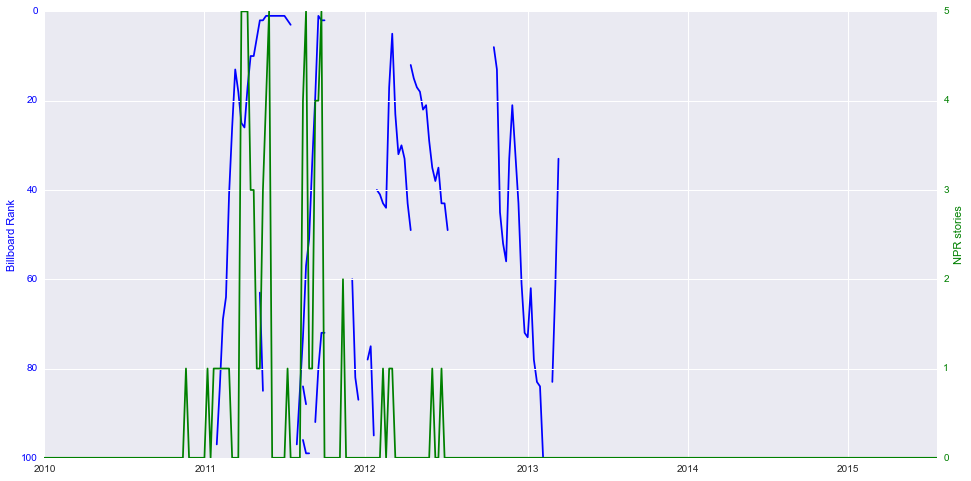

In [48]:
# Plot billboard history versus concerts
artist = 'Adele'

artist_tracks = bill2010.groupby('artist_name_clean').groups

tracks = [x for x in artist_tracks[artist] if x in billboard_by_week.keys()]

data = billboard_by_week[tracks]
data2 = concerts_by_week[artist]

f = plt.figure()
#ax = plt.subplot(111)
ax = data.plot(style='b-',legend=False)
ax.set_ybound(100,0)
ax.invert_yaxis()


ax2 = ax.twinx()
data2.plot(ax=ax2,style='g-',legend=False)

# Make the y-axis label and tick labels match the line color.
ax.set_ylabel('Billboard Rank', color='b')
for tl in ax.get_yticklabels():
    tl.set_color('b')

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('NPR stories', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

In [49]:
billboard_artist_stats_consistent.loc[artist]

tracks                                 6
tracks10                               3
tracks40                               4
weeks_total                          103
weeks_total10                         19
weeks_total40                         48
highest                                1
longest                               38
longest40                             27
longest10                             15
first_entered        2010-12-26 00:00:00
last_entered         2012-10-21 00:00:00
peak_date            2011-05-22 00:00:00
first_track_idx                      569
last_track_idx                       567
highest_track_idx                    569
longest_track_idx                    569
Name: Adele, dtype: object

In [50]:
# correlation and covariance for single artist time-series

artist = 'Adele'

npr1 = npr_stats.loc[artist]
concerts1 = concert_stats.loc[artist]
bill1 = billboard_artist_stats_consistent.loc[artist]

series1 = wiki_by_week[artist] 
series2 = concerts_by_week[artist] 
series3 = npr_by_week[artist] 
series4 = 100 - billboard_by_week[bill1.first_track_idx] # invert position
series5 = 100 - billboard_by_week[bill1.highest_track_idx]
series6 = 100 - billboard_by_week[bill1.longest_track_idx]

frame = pd.DataFrame({'wiki':series1,'concerts':series2,'npr':series3,'first_billboard':series4,
                     'top_billboard':series5,'long_billboard':series6})
frame.set_index(pd.DatetimeIndex(frame.index))
frame = frame[frame.index > '2010-12-31']

In [51]:
# pairwise correlation
frame.corr(method='spearman')

,concerts,first_billboard,long_billboard,npr,top_billboard,wiki
concerts,1.000000,0.073446,0.073446,-0.071646,0.073446,-0.030793
first_billboard,0.073446,1.000000,1.000000,-0.203713,1.000000,0.328199
long_billboard,0.073446,1.000000,1.000000,-0.203713,1.000000,0.328199
npr,-0.071646,-0.203713,-0.203713,1.000000,-0.203713,0.091303
top_billboard,0.073446,1.000000,1.000000,-0.203713,1.000000,0.328199
wiki,-0.030793,0.328199,0.328199,0.091303,0.328199,1.000000


In [52]:
# pairwise covarience
frame.cov()

,concerts,first_billboard,long_billboard,npr,top_billboard,wiki
concerts,1.004571,6.984234,6.984234,-0.013009,6.984234,-1.339878e+03
first_billboard,6.984234,617.298799,617.298799,-1.060060,617.298799,-3.729077e+02
long_billboard,6.984234,617.298799,617.298799,-1.060060,617.298799,-3.729077e+02
npr,-0.013009,-1.060060,-1.060060,0.057066,-1.060060,1.567416e+03
top_billboard,6.984234,617.298799,617.298799,-1.060060,617.298799,-3.729077e+02
wiki,-1339.877782,-372.907658,-372.907658,1567.415562,-372.907658,6.270971e+08


In [53]:
# collect correlation coefficients between timeseries for all artists

correls = {}
failed = []

for i,a in artists.iterrows():
# correlation and covariance for single artist time-series


    artist = a.artist_name_clean
    
    series = {}

    #try:
    try:
        series.update({'wiki':wiki_by_week[artist]})
    except:
        pass

    try:
        #concerts1 = concert_stats.loc[artist]
        series.update({'concerts':concerts_by_week[artist]})
    except:
        pass

    try:
        #npr1 = npr_stats.loc[artist]
        series.update({'npr':npr_by_week[artist]})
    except:
        pass

    try:
        bill1 = billboard_artist_stats_consistent.loc[artist]
        series.update({'first_billboard':100 - billboard_by_week[bill1.first_track_idx]}) # invert position
        series.update({'top_billboard':100 - billboard_by_week[bill1.highest_track_idx]})
        series.update({'long_billboard':100 - billboard_by_week[bill1.longest_track_idx]})
    except:
        pass

        #frame = pd.DataFrame({'wiki':series1,'concerts':series2,'npr':series3,'first_billboard':series4,
        #                     'top_billboard':series5,'long_billboard':series6})
    if len(series) > 1:
        frame = pd.DataFrame(series)                   
        frame.set_index(pd.DatetimeIndex(frame.index))
        frame = frame[frame.index > '2010-12-31']
        # pairwise correlation
        corr = frame.corr(method='spearman')
        correls.update({artist:corr})
        
    #except:
    #    failed.append(artist)
len(correls)

618

In [64]:
sns.distplot?

In [54]:
def plot_series_correlations(series1,series2):
    coefs = []
    #series1='wiki'; series2='concerts'
    for corr in correls.values():
        try:
            coef = corr.loc[series1,series2]
            if coef <= 1. and coef >= -1.:
                coefs.append(coef)
        except:
            pass

    sns.distplot(coefs)
    

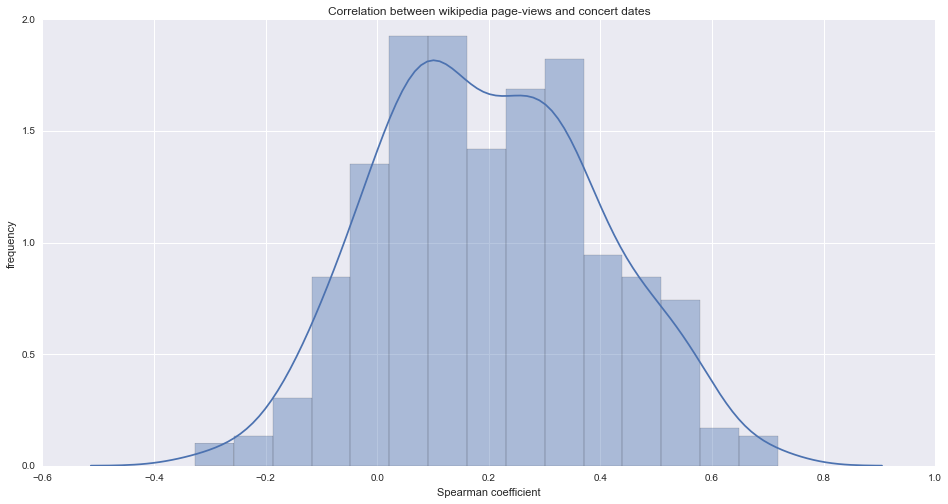

In [55]:
plot_series_correlations('wiki','concerts')
plt.title('Correlation between wikipedia page-views and concert dates')
plt.xlabel('Spearman coefficient')
plt.ylabel('frequency')

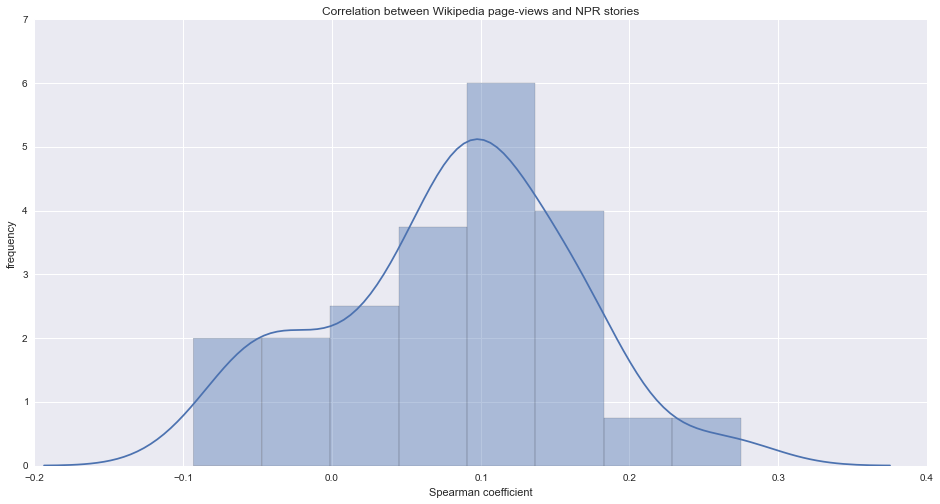

In [56]:
plot_series_correlations('wiki','npr')
plt.title('Correlation between Wikipedia page-views and NPR stories')
plt.xlabel('Spearman coefficient')
plt.ylabel('frequency')

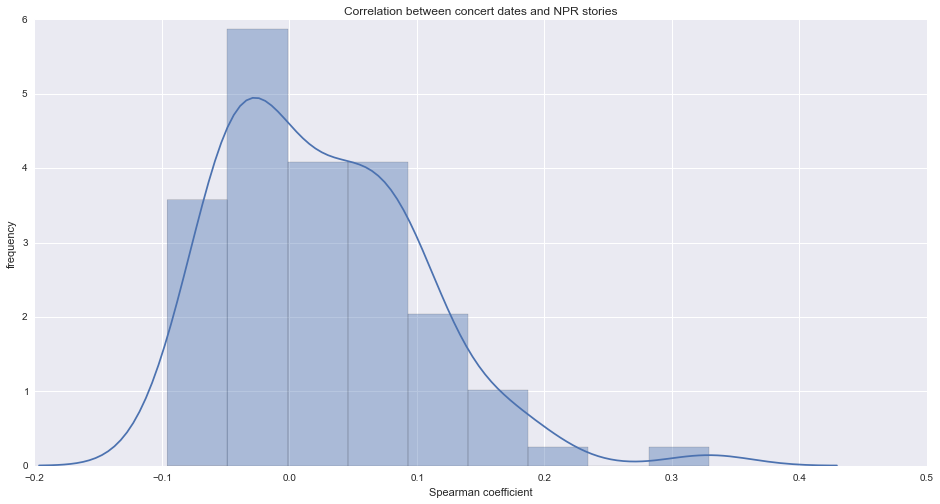

In [57]:
plot_series_correlations('concerts','npr')
plt.title('Correlation between concert dates and NPR stories')
plt.xlabel('Spearman coefficient')
plt.ylabel('frequency')

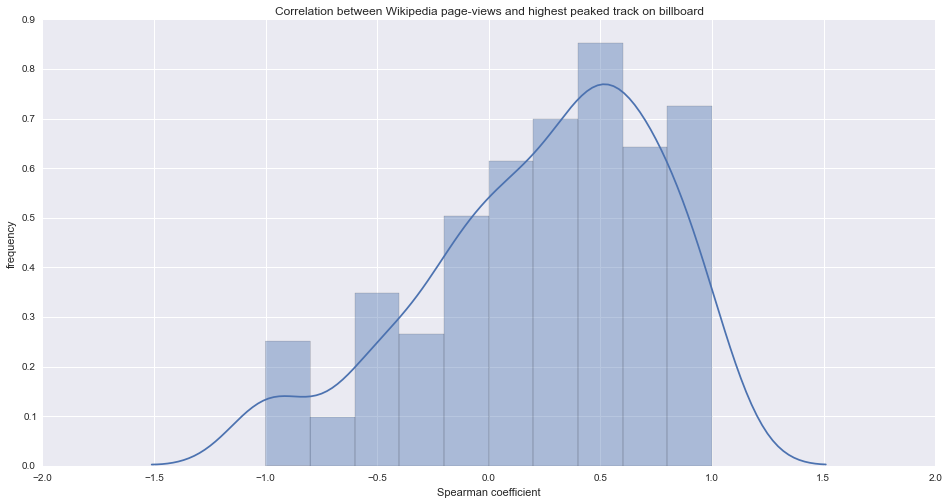

In [58]:
plot_series_correlations('wiki','top_billboard')
plt.title('Correlation between Wikipedia page-views and highest peaked track on billboard')
plt.xlabel('Spearman coefficient')
plt.ylabel('frequency')

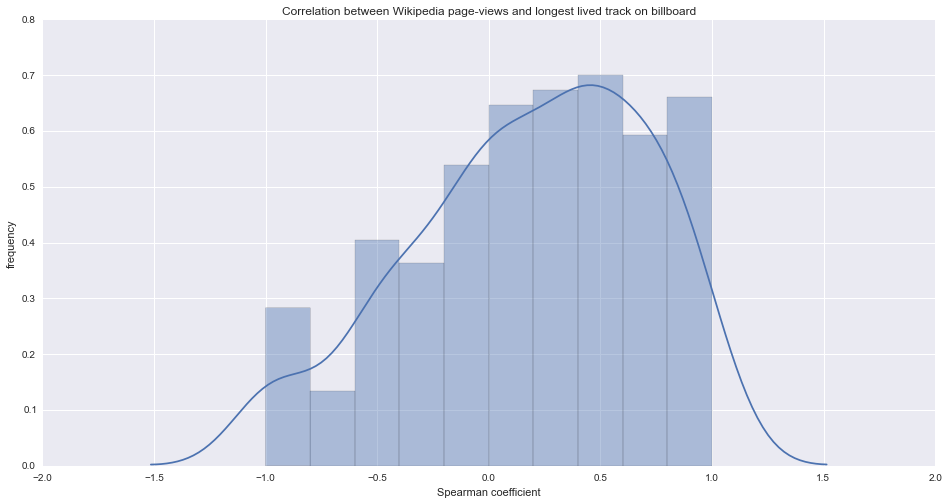

In [59]:
plot_series_correlations('wiki','long_billboard')
plt.title('Correlation between Wikipedia page-views and longest lived track on billboard')
plt.xlabel('Spearman coefficient')
plt.ylabel('frequency')

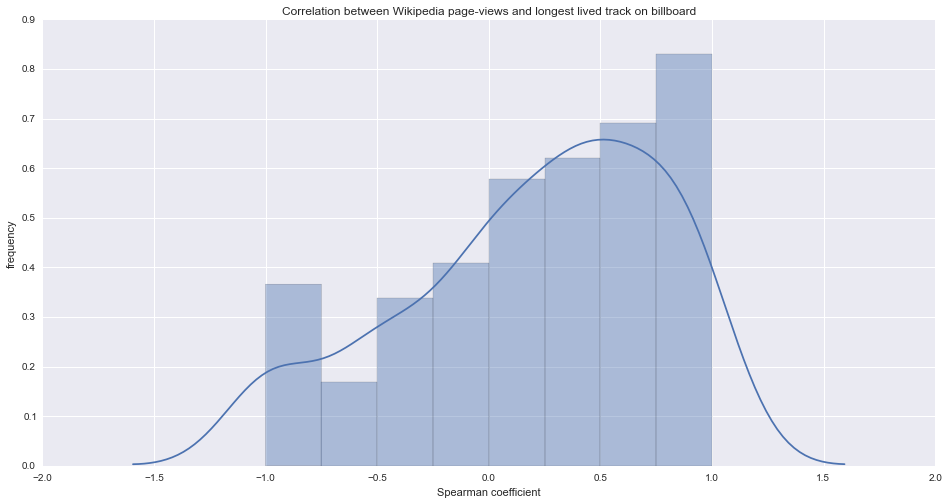

In [61]:
plot_series_correlations('wiki','first_billboard')
plt.title('Correlation between Wikipedia page-views and longest lived track on billboard')
plt.xlabel('Spearman coefficient')
plt.ylabel('frequency')

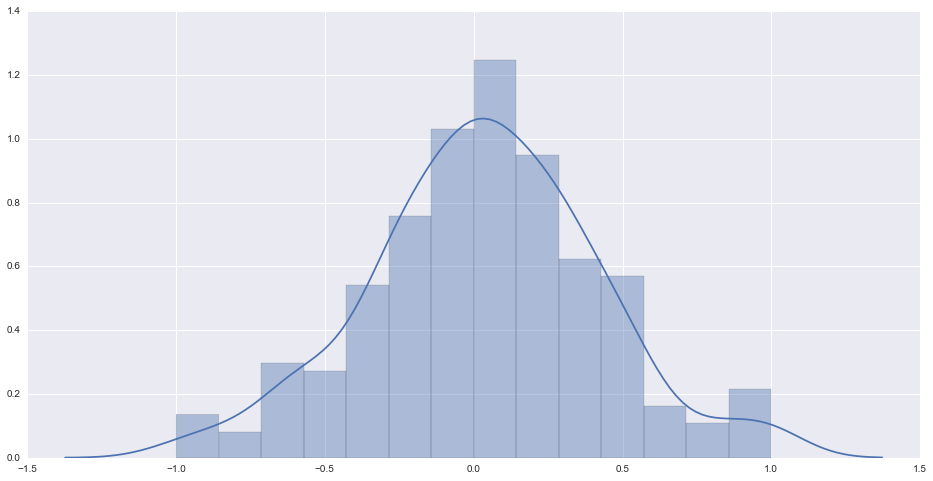

In [69]:
plot_series_correlations('concerts','top_billboard')

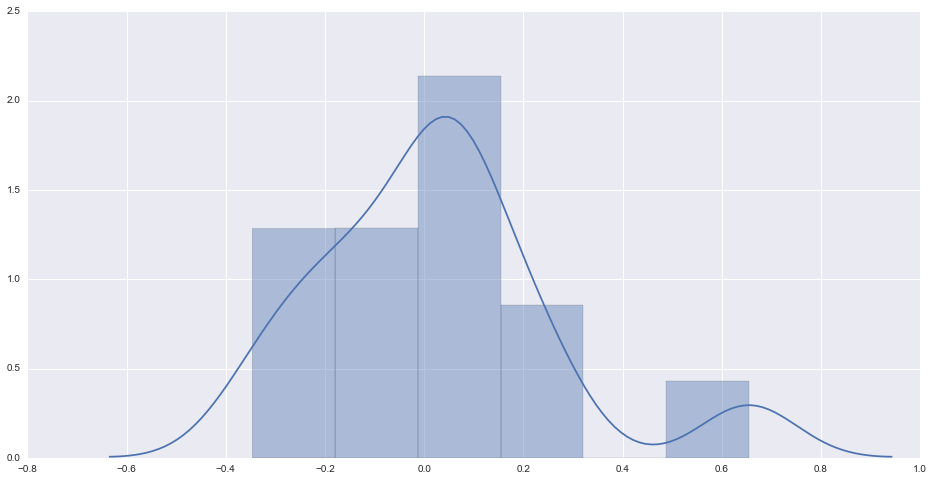

In [72]:
plot_series_correlations('npr','first_billboard')

In [ ]:
# Notes on correlations.

# Wikipedia shows a stronger positive correlation with the billboard position than npr or concerts

# Of these the first appearance on the billboard seems to have the best correlation
# it would be interesting to see if this improves for artists that were new within the period.

# Wikipedia views shows a strong positive correlation with concert dates

# NPR views show a week positive correlation with 

# NPR stories and concerts appear uncorrelated

# NPR stories probably dont have enough artists to further break up the 

In [136]:
#billboard_artist_stats_consistent.iloc[:,:10]
#concert_stats
#npr_stats
#wiki_stats

In [128]:
# correlations on aggregated data
stats = pd.DataFrame(artists.artist_name_clean)
stats = pd.merge(stats, billboard_artist_stats_consistent.iloc[:,:10],how='left',left_on='artist_name_clean',right_index=True)
stats = pd.merge(stats,concert_stats,how='left',left_on='artist_name_clean',right_index=True,suffixes=('','concerts'))
stats = pd.merge(stats,npr_stats,how='left',left_on='artist_name_clean',right_index=True,suffixes=('','npr'))
stats = pd.merge(stats,wiki_stats,how='left',left_on='artist_name_clean',right_index=True,suffixes=('','wiki'))
stats = stats.set_index(stats.artist_name_clean)
stats = stats.iloc[:,1:]

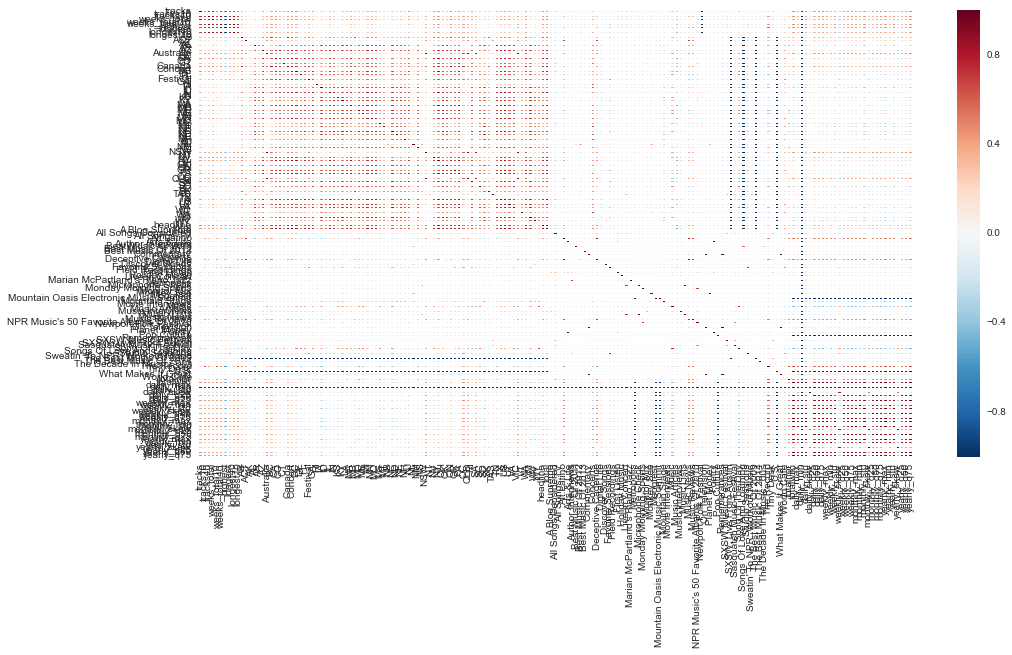

In [135]:
agg_corr = stats.corr(method='spearman')
sns.heatmap(agg_corr)

# summary: billboard, concert and wiki statistics are all highly self correlated.
# npr shows are non (in general) closely correlated with each other.
# more uniform correlation of billboard with (most) wikipedia and concert statistics, but only specifc npr shows.

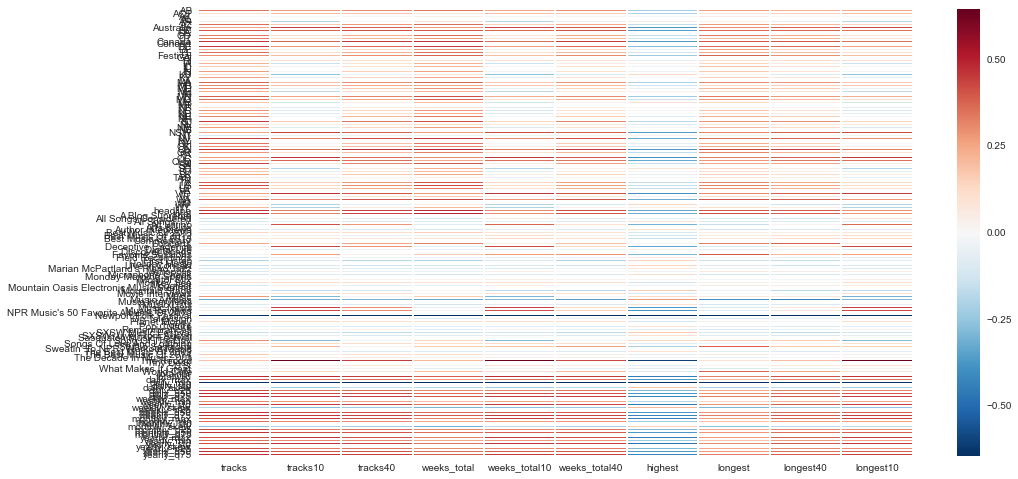

In [144]:
corr_with_billboard = agg_corr[[u'tracks', u'tracks10', u'tracks40', u'weeks_total', u'weeks_total10', u'weeks_total40', u'highest', u'longest', u'longest40', u'longest10']].iloc[10:]
sns.heatmap(corr_with_billboard)

In [153]:
# looking for strongest correlations with billboard peak
field = 'highest'
pd.DataFrame(corr_with_billboard[field]).sort(field)

# The Record (sum = 125) has outstanding correlation (-0.6) http://www.npr.org/sections/therecord/

# next comes several wikipedia statistics (-.47 to -.4)
# best correlation comes from aggregates std > aggregated maximum > total views > other.

# totalnpr (-.39)

# then a mixture of concert locations and npr shows: notable ones
# QC (-0.393342), VIC, AUSTRALIA, Canada, NSW, BC, CA (-0.337986)
# 'Music Reviews' (-0.378150), 'Music News','Deceptive Cadence (-0.333493)'

# Interestingly non-US locations seem to correlate better
# CA if st the best correlating US State

# most NPR shows are really low

,highest
The Record,-0.607523
monthly_std,-0.473466
yearly_std,-0.473466
weekly_std,-0.460734
monthly_max,-0.447530
yearly_max,-0.447530
totalwiki,-0.446788
daily_std,-0.436857
daily_q75,-0.429601
yearly_q75,-0.428922


In [155]:
# looking for strongest correlations with most billboard tracks
field = 'tracks'
pd.DataFrame(corr_with_billboard[field]).sort(field,ascending=False)

# Concert (.49) is number of events with type concert, headline (.47), total
# total wikipedia page views
# wikipedia quartiles (~.47) - 75% is particulary high, then 50 %

# places
#'ON' (.47), 'CA' (.46), 'NJ' (.45), Canada, NV, DC, NY, RI, PA (.43)

,tracks
Concert,0.485807
totalwiki,0.479074
daily_q50,0.474452
daily_q75,0.474069
monthly_q75,0.473122
yearly_q75,0.473122
weekly_q75,0.472755
headline,0.470827
total,0.470286
ON,0.470272


In [158]:
# looking for strongest correlations with most billboard tracks
field = 'tracks10'
pd.DataFrame(corr_with_billboard[field]).sort(field,ascending=False)

# 'The Record' is again outstanding match for things with a high peak on the chart (.64)

# totalwiki (.48), std, quartiles (75 %),

# locations : QC(.47), VIC, Austrailia (.45), NSW

# totalnpr (.44), Music News, Deceptive Cadence, Music Reviews (.42)

,tracks10
The Record,0.644854
totalwiki,0.477925
QC,0.472604
VIC,0.469696
yearly_std,0.466478
monthly_std,0.466478
daily_q75,0.462952
yearly_q75,0.461042
monthly_q75,0.461042
weekly_q75,0.460548


In [159]:
# looking for strongest correlations with most billboard tracks
field = 'longest'
pd.DataFrame(corr_with_billboard[field]).sort(field,ascending=False)

# This looks the most different of the other billboard attributes so far

# CA (.44), ON, WA, CA (.40), NY (.37)  (much more skewed towards american States)

# concerts: total, Concert, headline, festival (.37)

#npr: Favorite Sessions, Studio Session, World Cafe

,longest
CA,0.443995
ON,0.429958
total,0.421623
Concert,0.415740
headline,0.404920
WA,0.403900
Canada,0.400796
Favorite Sessions,0.397415
Studio Sessions,0.385150
Festival,0.376505


In [163]:
# looking for strongest correlations with most billboard tracks
field = 'weeks_total'
pd.DataFrame(corr_with_billboard[field]).sort(field,ascending=False)

# looks very similar to 'longest'

# concerts: Concert(.50), total, headline,

# states 'CA', 'ON'

# wikipedia quartiles (.40)

# npr not close

# summary: There may be a significant difference between the best predictors of billboard peak and billboard
# longevity. Number of times on the billboard seem to have closer predictors to billboard peak than to billboard
# longevity.

# wikipedia correlation is relatively high for peak and number of times on billboard. Whereas concerts stats are
# relatively strong for longevity.
# std and quartile

# The npr shows with high correlation are different for billboard peak and longevity.
# 'The record' is an outlier in high correlation with billboard peak.

# total number of concerts and related statistics are relatively high, along with particular states.
# CA is consistently high compared to other American States.
# ON is consistently high among Canadian states
# Foreign locations (states and Countries) are the strongest for peak and number of tracks
# American states are stronger for longevity


,weeks_total
Concert,0.501562
total,0.495382
CA,0.495269
ON,0.488582
headline,0.482505
Canada,0.467995
NV,0.456989
DC,0.445752
NY,0.445528
WA,0.427651


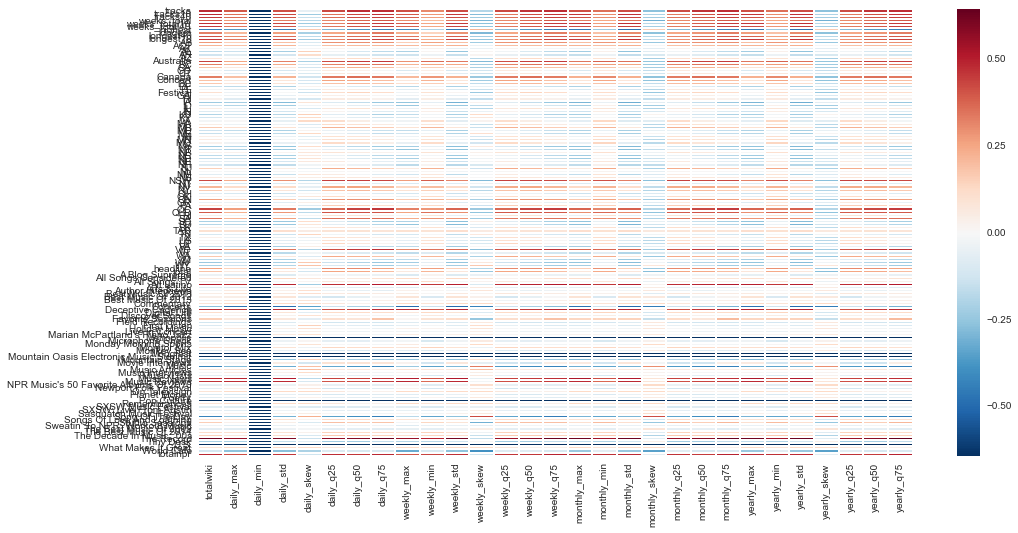

In [170]:
# what predicts wikipedia views
corr_with_wiki = agg_corr[agg_corr.keys()[-29:]].iloc[:-29]
sns.heatmap(corr_with_wiki)

In [171]:
# looking for strongest correlations with most billboard tracks
field = 'totalwiki'
pd.DataFrame(corr_with_wiki[field]).sort(field,ascending=False)

# particular NPR shows very high (these were similar to the ones at the peak)
# 'the Record' (.62), Alt.Latino, Music News, Deceptive Cadence, Music Reviews
# total npr also high (.48)

# billboard: total number of tracks, then top 10 metrics, then top 40

# concerts relatively low, but non-American states are the highest.
#VIC,Australia,QC,NSW

,totalwiki
The Record,0.622129
Alt.Latino,0.502077
Music News,0.488223
totalnpr,0.484252
Deceptive Cadence,0.481050
tracks,0.479074
tracks10,0.477925
weeks_total10,0.469336
Music Reviews,0.463878
longest10,0.461818


In [172]:
# looking for strongest correlations with most billboard tracks
field = 'daily_max'
pd.DataFrame(corr_with_wiki[field]).sort(field,ascending=False)

# very similar to total number



,daily_max
The Record,0.559879
Music News,0.488367
Music Reviews,0.473673
Alt.Latino,0.468122
Deceptive Cadence,0.452487
totalnpr,0.422027
tracks,0.401079
tracks40,0.356898
tracks10,0.355864
weeks_total10,0.350837


In [176]:
# looking for strongest correlations with most billboard tracks
field = 'monthly_std'
pd.DataFrame(corr_with_wiki[field]).sort(field,ascending=False)

# standard deviations are also very similar to other wiki statistics

,monthly_std
The Record,0.629993
Music News,0.515430
Alt.Latino,0.498080
Deceptive Cadence,0.495331
Music Reviews,0.486127
totalnpr,0.478177
weeks_total10,0.467584
tracks10,0.466478
longest10,0.462498
weeks_total40,0.439055


In [ ]:
# summary:

# All simple wikipedia statistics seem to have very similar correlations to each other.

# Particular NPR Shows are the highes correlations, the same shows that were similarly highly correlated
# with billboard peaks.

# billboard peak data is more highly correlated than concerts

# concert locations are dominated by Foreign locations.